In [ ]:
import numpy as np
import pandas as pd
import nltk # to access the English dictionary
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Import dataset
df = pd.read_csv("lyrics_df.csv", encoding="latin1")
text = df['words'].str.cat(sep=' ')

In [ ]:
# Print lyrics (stopwords have already been removed before importing the dataset)
print(text)
print(len(text))

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="black", collocations=False).generate(text)

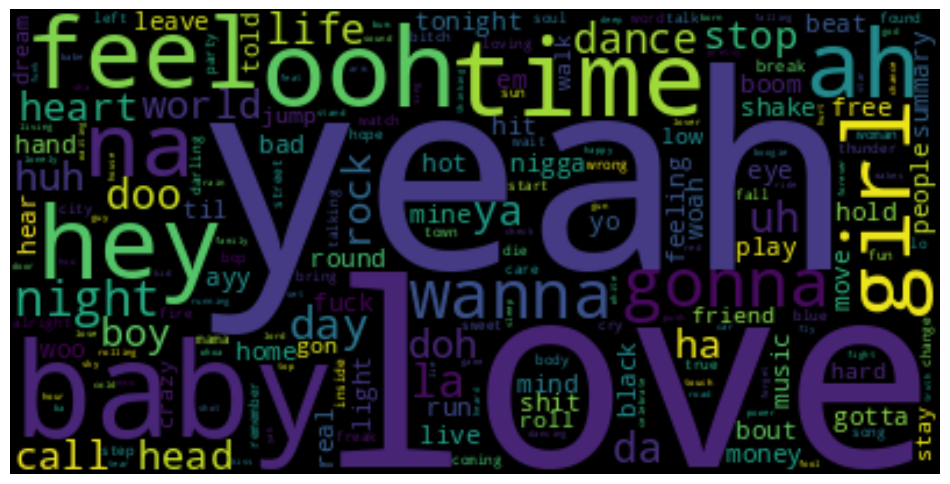

In [ ]:
# Display the generated image:
plt.figure(figsize=(12, 8))  # Adjust the figure size for high resolution
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig("WC_full_lyrics.png", dpi=500)  # Save the word cloud with high resolution
plt.savefig("WC_full_lyrics.png", bbox_inches='tight', pad_inches=0, dpi=500)
plt.show()

We will proceed to filter out words that do not belong to the English vocabulary. This includes slang and filler expressions, which are commonly found in lyrics but may not be recognized by standard English dictionaries.

In [ ]:
# Download English vocabulary
nltk.download('words')
from nltk.corpus import words
english_words = set(words.words())

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
# Filter out non-English words
english_words_only = [word for word in text.split() if word.lower() in english_words]

# Join the filtered words back into a string
filtered_text = ' '.join(english_words_only)

In [ ]:
print(filtered_text)
print(len(english_words_only))
print('Deleted words: ')
print(len(text)-len(filtered_text))

In [ ]:
# Create and generate a word cloud image:
wordcloud2 = WordCloud(background_color="black", collocations=False).generate(filtered_text)

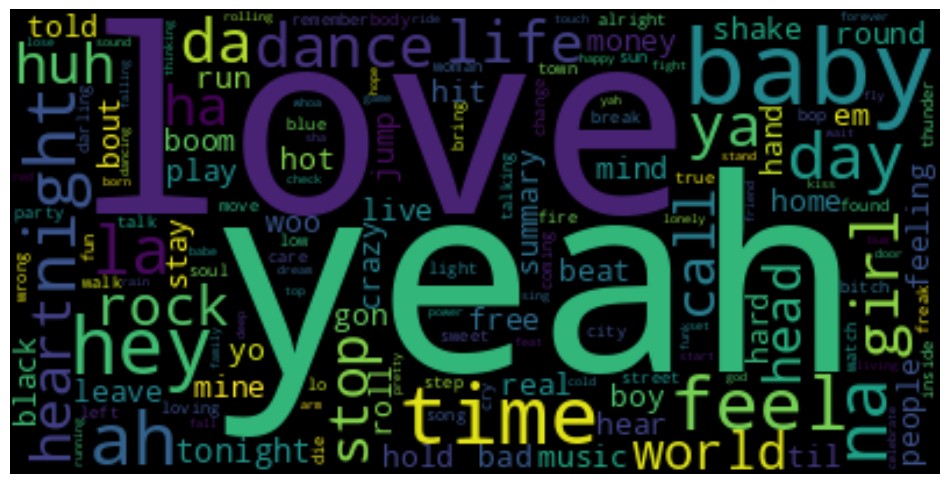

In [ ]:
# Display the generated image:
plt.figure(figsize=(12, 8))  # Adjust the figure size for high resolution
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.savefig("WC_English_words_only.png", dpi=500)  # Save the word cloud with high resolution
plt.show()

In [ ]:
# Filter out 2-letters words
to_delete = ['na','la','yeah','ha', 'da', 'lo', 'woo', 'wah', 'hey', 'ah', 'em', 'huh', 'ya','yo','uh']
text2 = [word for word in filtered_text.split() if word.lower() not in to_delete]
print(len(text2))

64395


In [ ]:
# Join the filtered words back into a string
text2 = ' '.join(text2)

In [ ]:
# Create and generate a word cloud image:
wordcloud3 = WordCloud(background_color="black", collocations=False, random_state=2).generate(text2)

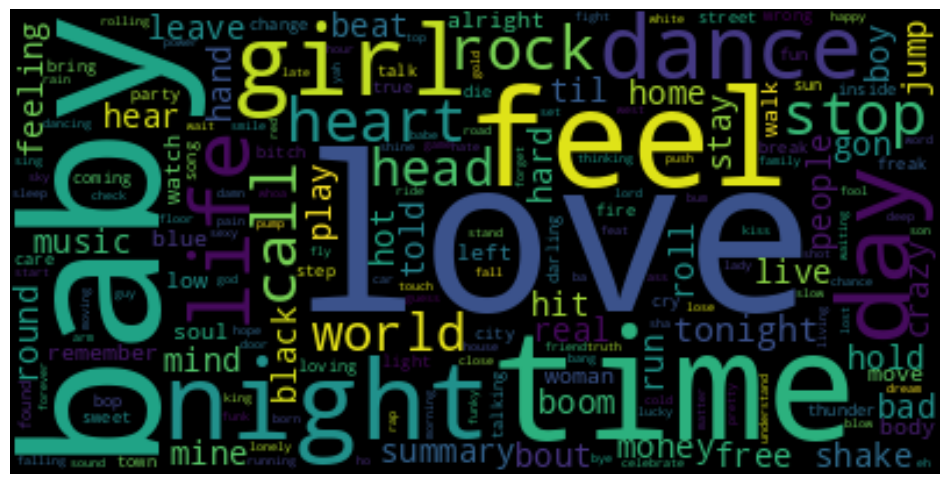

In [ ]:
# Display the generated image:
plt.figure(figsize=(12, 8))  # Adjust the figure size for high resolution
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig("WC_without_short_words.png")  # Save the word cloud with high resolution
plt.show()

Wordcloud after stemming

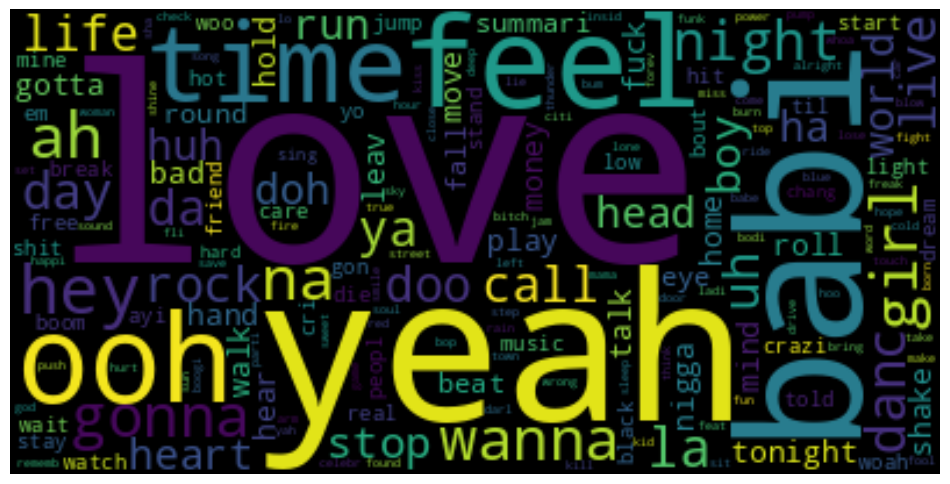

In [ ]:
# Import dataset
stem_df = pd.read_csv("stemmed_lyrics_df.csv", encoding="latin1")
stem_text = stem_df['words'].str.cat(sep=' ')

# Create and generate a word cloud image:
wordcloud4 = WordCloud(background_color="black", collocations=False).generate(stem_text)

# Display the generated image:
plt.figure(figsize=(12, 8))  # Adjust the figure size for high resolution
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.savefig("WC_stemmed_words.png")  # Save the word cloud with high resolution
plt.show()